# Customer churn prediction for a Telecommunications Company

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [8]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [9]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges.dtype

dtype('float64')

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# Drop nulls in TotalCharges

df.dropna(subset=['TotalCharges'], inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
for col in df.columns:
    print(col, ': ', df[col].unique())

customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed c

In [13]:
cols_to_replace = ['OnlineSecurity', 'MultipleLines',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [14]:
for col in cols_to_replace:
    df[col].replace({'No internet service': 'No',
                     'No phone service': 'No'},inplace=True)
    
for col in cols_to_replace:
    print(df[col].unique(), sep='\n')

['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


# EDA

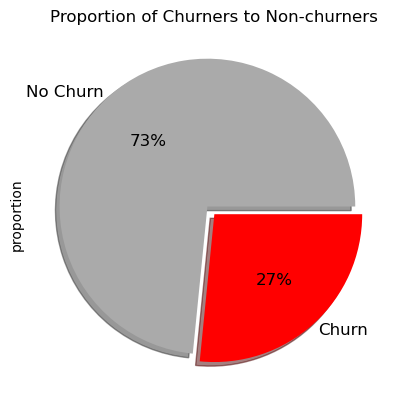

In [15]:
# What is the churn percentage?

plt.figure()
percents = df['Churn'].value_counts(normalize=True) * 100
percents.plot(kind='pie',
              autopct='%.0f%%',
              textprops={'fontsize': '12'},
              explode=(0.07, 0),
              shadow={'edgecolor': 'none', 'shade': 0.5},
              colors=['#aaa', 'red'],
              labeldistance=1.05,
              labels=['No Churn', 'Churn'])

plt.title('Proportion of Churners to Non-churners')
plt.show()

In [16]:
# A churn rate of 27% is high

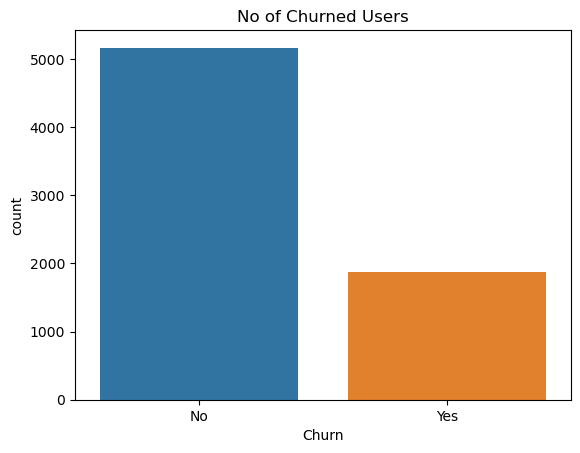

In [17]:
# How many users churned?

plt.figure()
sns.countplot(x='Churn', data=df)

plt.title('No of Churned Users');

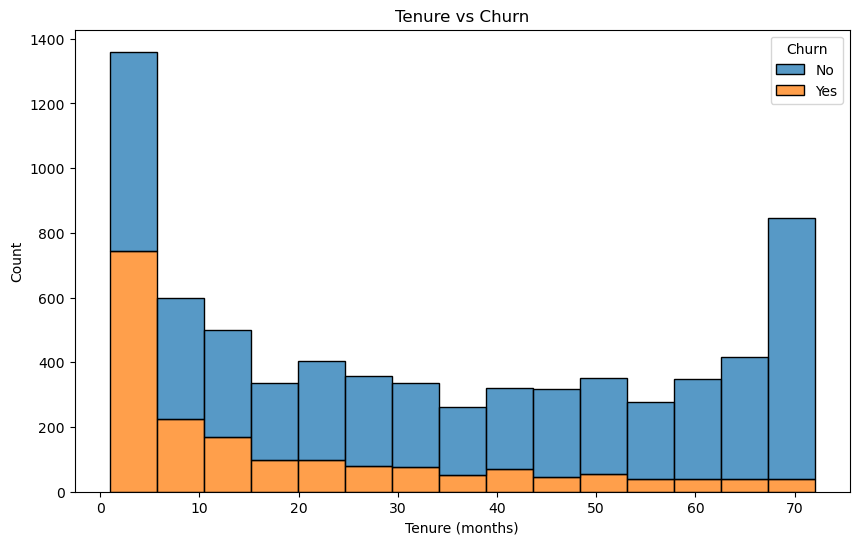

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(x='tenure', hue='Churn', data=df, multiple='stack');

plt.xlabel('Tenure (months)')
plt.title('Tenure vs Churn');

In [19]:
# Customers with shorter tenure are more likely to churn
# The likelihood of churn decreases with increase in tenure

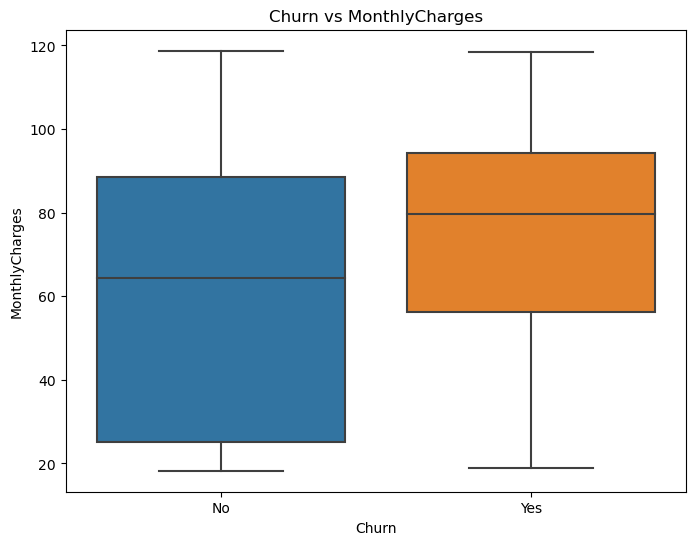

In [20]:
# Monthly charges vs Churn

plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df);
plt.title('Churn vs MonthlyCharges');

In [21]:
# Customers have higher monthly charges tend to churn.
# The median monthly charge of churned customers is higher than those who non-churners

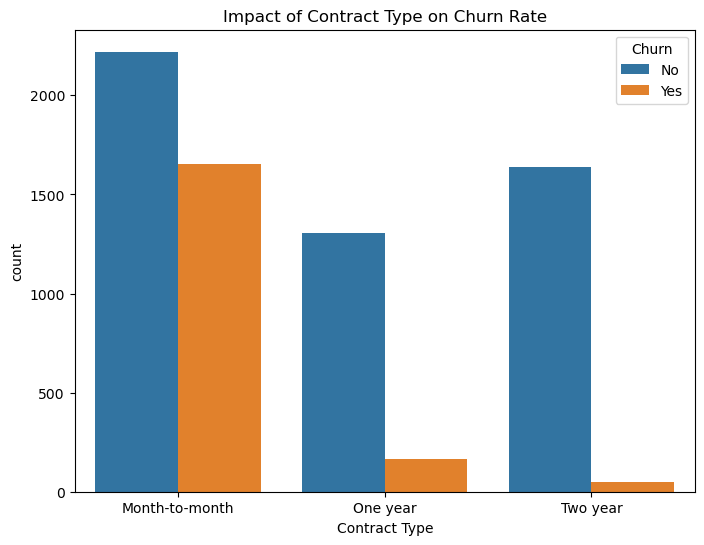

In [22]:
# The impact of contract type on churn

plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df);
plt.title('Impact of Contract Type on Churn Rate')
plt.xlabel('Contract Type');

In [23]:
# Customers with m-to-m contracts are most likely to churn
# Longer contracts have LOWER churn rates

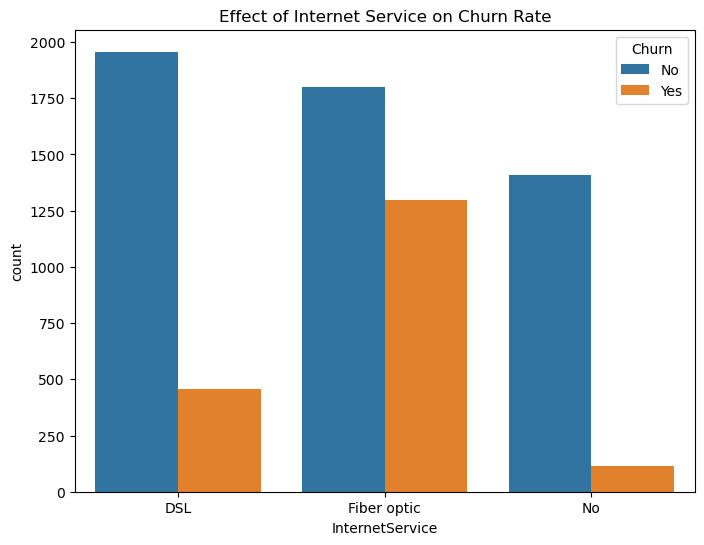

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)

plt.title('Effect of Internet Service on Churn Rate')
plt.xlabel('InternetService');

In [25]:
# Customers using the Fibre Optic service tend to have higher churn rates

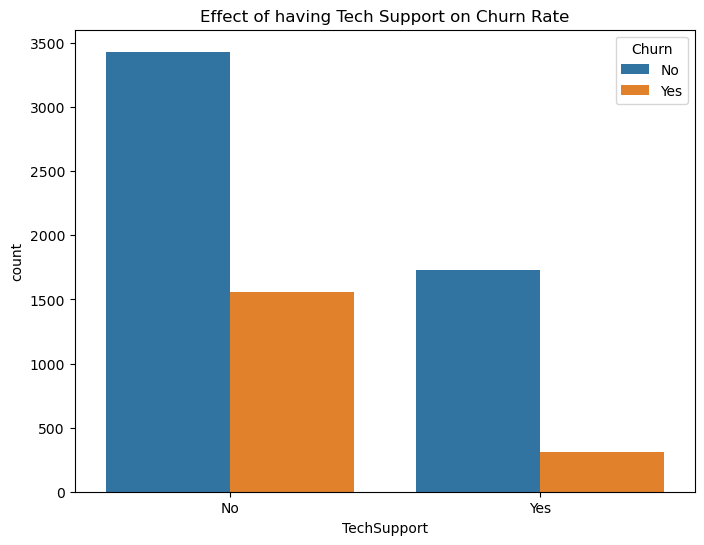

In [26]:
plt.figure(figsize=(8, 6))
plt.title('Effect of having Tech Support on Churn Rate');

sns.countplot(x='TechSupport', hue='Churn', data=df);

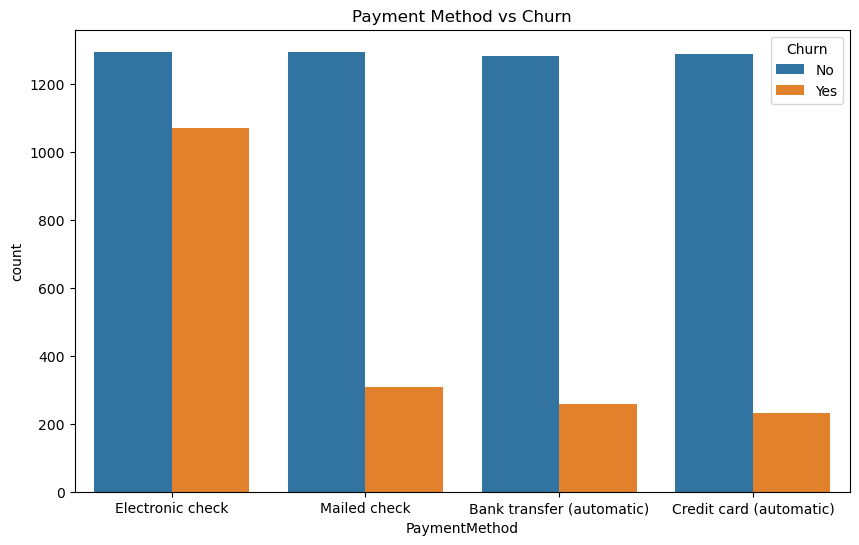

In [27]:
plt.figure(figsize=(10, 6))
plt.title('Payment Method vs Churn');
sns.countplot(x='PaymentMethod', hue='Churn', data=df);

In [28]:
# Customers using the Electronic Check payment method have a higher churn

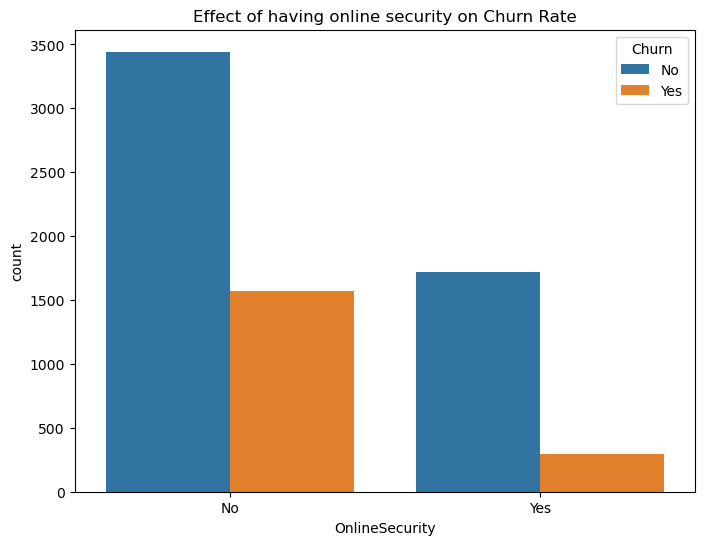

In [29]:
plt.figure(figsize=(8, 6))

sns.countplot(x='OnlineSecurity', hue='Churn', data=df);
plt.title('Effect of having online security on Churn Rate');

In [30]:
# Customers with no online security have a high tendency to churn

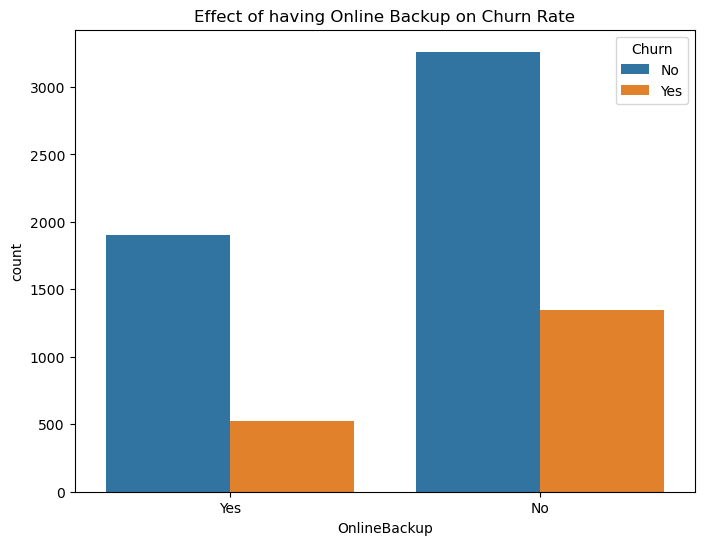

In [31]:
plt.figure(figsize=(8, 6))

sns.countplot(x='OnlineBackup', hue='Churn', data=df);
plt.title('Effect of having Online Backup on Churn Rate');

In [32]:
# Customers not having online backup are likely to churn

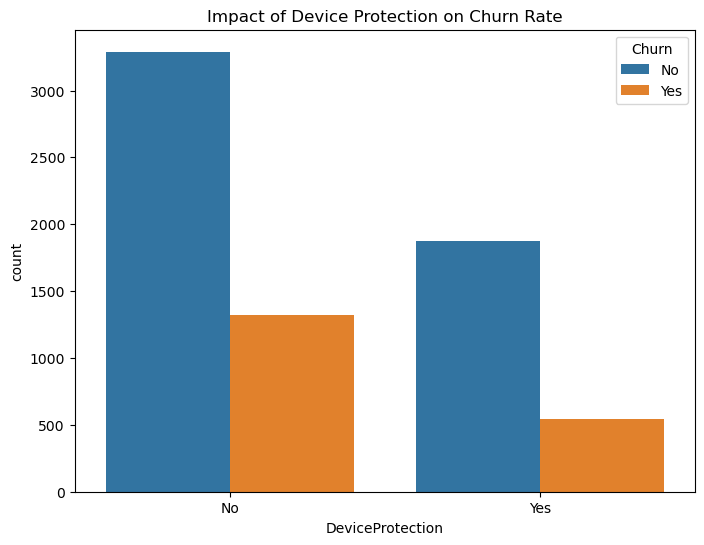

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='DeviceProtection', hue='Churn', data=df);
plt.title('Impact of Device Protection on Churn Rate');

In [34]:
# Customers with no device protection are likely to churn

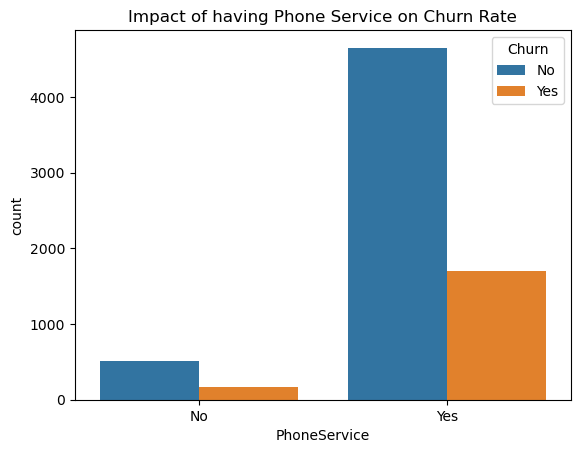

In [35]:
sns.countplot(x='PhoneService', hue='Churn', data=df);
plt.title('Impact of having Phone Service on Churn Rate');

In [36]:
# Customers who have phone service have a higher tendency to churn than those who don't.

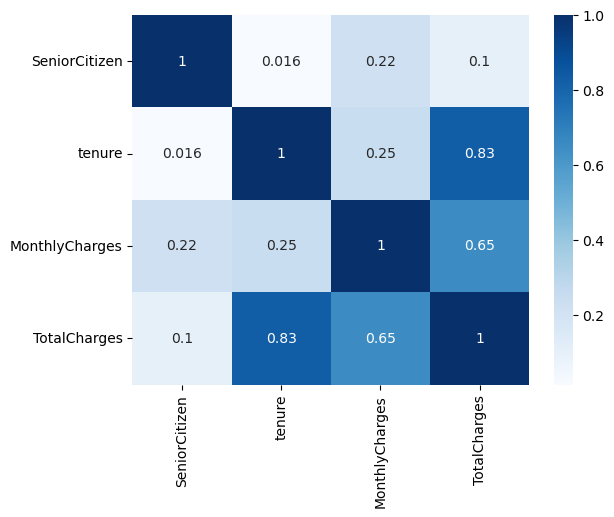

In [37]:
sns.heatmap(df.select_dtypes(['int', 'float']).corr(), annot=True, cmap='Blues');

## Feature Engineering

In [38]:
df.drop(columns=['customerID'], inplace=True)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
# Select features & target
X = df.drop(columns='Churn')
y = df['Churn']

In [41]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [42]:
# for col in ['InternetService', 'Contract', 'PaymentMethod']:
#     print(df[col].unique())
    
# ['DSL' 'Fiber optic' 'No']
# ['Month-to-month' 'One year' 'Two year']
# ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
#  'Credit card (automatic)']

# ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']

In [43]:
X.replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0 }, inplace=True)
X['InternetService'].replace({'DSL': 0, 'Fiber optic': 1, 'No': 2}, inplace=True)
X['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2}, inplace=True)

X['PaymentMethod'].replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2,
                            'Credit card (automatic)': 2}, inplace=True)

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,2,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65


In [44]:
y.replace({'Yes': 1, 'No': 0}, inplace=True)
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [45]:
# Check class imbalance
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [46]:
# Oversample data in minority class
from imblearn.over_sampling import SMOTE

SM = SMOTE(random_state=41)
X_smote, y_smote = SM.fit_resample(X, y)
y_smote.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [47]:
X_smote.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,29.85,29.85
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,2,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65


In [48]:
# Split data into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=52)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [50]:
# Train the Random Forest classifier
forest = RandomForestClassifier(n_estimators=55, max_depth=13, random_state=44)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, n_estimators=55, random_state=44)

In [51]:
# Predict test data
y_pred = forest.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [52]:
# Classification accuracy
metrics.accuracy_score(y_test, y_pred)

0.8325266214908035

In [53]:
metrics.f1_score(y_test, y_pred)

0.8358633776091082

In [54]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1051
           1       0.81      0.87      0.84      1015

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



In [55]:
# Confusion metrics
metrics.confusion_matrix(y_test, y_pred)

array([[839, 212],
       [134, 881]], dtype=int64)

In [56]:
# Feature importances judged by Random Forest model
forest.feature_importances_

array([0.02184517, 0.01167277, 0.0277067 , 0.03824482, 0.14268704,
       0.01345247, 0.01336746, 0.05140514, 0.04495679, 0.02209632,
       0.01702373, 0.05104295, 0.01198051, 0.01362378, 0.14617338,
       0.01520058, 0.07443266, 0.16071478, 0.12237294])

In [57]:
import sklearn

def get_feature_importances_table(forest: sklearn.ensemble._forest.RandomForestClassifier):
    to_percent = lambda x: int(np.round(x*100))
    table = pd.DataFrame({'features': forest.feature_names_in_,
                          'importance (%)': map(to_percent, forest.feature_importances_)})
    return table.sort_values('importance (%)', ascending=False)

In [58]:
table = get_feature_importances_table(forest)
table

,features,importance (%)
17,MonthlyCharges,16
14,Contract,15
4,tenure,14
18,TotalCharges,12
16,PaymentMethod,7
11,TechSupport,5
7,InternetService,5
3,Dependents,4
8,OnlineSecurity,4
2,Partner,3


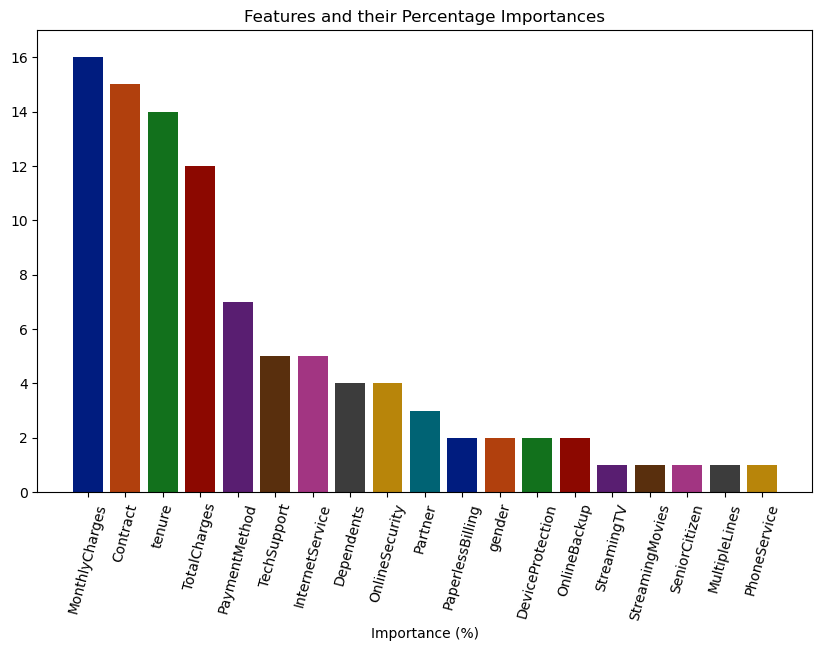

In [59]:
plt.figure(figsize=(10, 6))

plt.bar(table.features,
        table['importance (%)'],
        color=sns.color_palette('dark'))

plt.title('Features and their Percentage Importances')
plt.xlabel('Feature')
plt.xlabel('Importance (%)')
plt.xticks(rotation=75)
plt.ylim(0, 1 + table['importance (%)'].max())
plt.show()

In [60]:
least_features = table[table['importance (%)'] <=1].features
least_features

12        StreamingTV
13    StreamingMovies
1       SeniorCitizen
6       MultipleLines
5        PhoneService
Name: features, dtype: object

In [94]:
X_train_final = X_smote.drop(columns=list(least_features))

In [95]:
X_train_final.columns

Index(['gender', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [96]:
# Create a new model and train with full data
forest_final = RandomForestClassifier(n_estimators=55, max_depth=13, random_state=44)
forest_final.fit(X_train_final, y_smote)

RandomForestClassifier(max_depth=13, n_estimators=55, random_state=44)

In [97]:
y_pred_final = forest_final.predict(X_train_final)
y_pred_final

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [92]:
table_final = get_feature_importances_table(forest_final)
table_final.reset_index(drop=True)

,features,importance (%)
0,MonthlyCharges,17
1,Contract,16
2,TotalCharges,14
3,tenure,13
4,PaymentMethod,10
5,InternetService,6
6,OnlineSecurity,5
7,TechSupport,5
8,Partner,4
9,Dependents,3


In [65]:
import joblib
joblib.dump(forest_final, 'forest_final_churn.pkl')

['forest_final_churn.pkl']

# Using Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [67]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\Chima Orji\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_pred_log = logmodel.predict(X_test)
y_pred_log

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [69]:
metrics.accuracy_score(y_test, y_pred_log)

0.8063891577928364

In [70]:
print(metrics.classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1051
           1       0.78      0.85      0.81      1015

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



In [71]:
forest_final.feature_names_in_

array(['gender', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'], dtype=object)

#### Conclusion: The Random Forest model is a better model!

In [72]:
interpret_pred = lambda val: 'CHURN' if val else 'WONT_CHURN'

In [73]:
def predict_customer_churn(val, whichmodel='first'): # model:'first' | 'final'
    model = finalforest if whichmodel=='final' else forest
    if whichmodel=='final':
        val = val.drop(columns=least_features, axis=1)
        
    preds = model.predict(val)
    return list(map(interpret_pred, preds))

In [74]:
customers = X_test[10:15]

print(predict_customer_churn(customers, 'first'))
pd.concat([y_test[10:15], customers], axis=1)

['WONT_CHURN', 'WONT_CHURN', 'CHURN', 'CHURN', 'CHURN']


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2414,0,0,0,0,0,11,1,0,0,0,0,1,1,0,0,1,0,2,53.80000,651.550000
2464,0,0,0,0,0,29,1,0,0,0,0,0,0,0,0,1,0,1,20.00000,599.300000
9095,1,0,0,0,0,6,1,0,1,0,0,0,0,1,0,0,1,0,80.86250,526.304395
10156,1,0,0,1,0,27,1,0,1,0,0,0,0,0,1,0,1,0,82.30092,2227.508358
5277,1,1,0,1,0,8,1,0,1,1,0,0,0,0,0,0,1,0,74.50000,609.900000


In [75]:
from joblib import load, dump

In [76]:
dump(forest, 'forest_churn_83.pkl')

['forest_churn_83.pkl']